In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from PIL import Image
from PIL import ImageOps

%matplotlib inline
from gpx_converter import Converter


In [58]:
watershed = cv2.imread('linia_2.jpg',0)

In [134]:
img = cv2.imread('mapa.jpg').astype(np.float32)
#img = img[:480,:880]

plt.figure(figsize=(40, 40), dpi=80)
plt.imshow(img, cmap = 'gray')
ax = plt.gca()
ax.set_xticks(np.arange(0,img.shape[1],2))
ax.set_yticks(np.arange(0,img.shape[0],2))
ax.grid(color='red', linestyle='-.', linewidth=1)
#ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.savefig('foo.png')
plt.show()

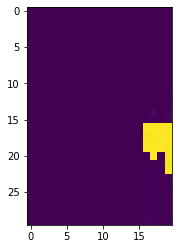

In [60]:
plt.imshow(watershed[220:250, 280:300])

In [61]:
river_start = (220+18, 280+16)

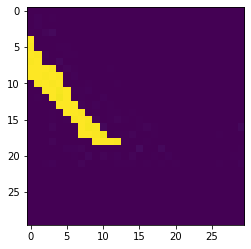

In [62]:
plt.imshow(watershed[850:880, 450:480])

In [63]:
river_end = 850+18, 450+10

In [64]:
import tcod
graph = tcod.path.CustomGraph(watershed.shape)
CARDINAL = [
     [1, 1, 1],
     [1, 0, 1],
     [1, 1, 1],]

In [65]:
graph.add_edges(edge_map=CARDINAL, cost=watershed)
pf = tcod.path.Pathfinder(graph)
pf.add_root(river_start)
pf.resolve()
pf.distance

path = pf.path_to(river_end)

In [68]:
len(path)

862

In [90]:
hel = (54.595659, 18.809465)
hel_pix = (142, 450)

bug = (52.283175, 23.178295)
bug_pix = (466, 824)

In [192]:
step_y = (hel[0]-bug[0])/(hel_pix[0]-bug_pix[0])
step_y

-0.007137296296296289

In [193]:
step_x = (hel[1]-bug[1])/(hel_pix[1]-bug_pix[1])
step_x

0.011681363636363634

In [117]:
start = hel[0]-hel_pix[0]*step_x, hel[1]-hel_pix[1]*step_y

(55.60915507407407, 13.552851363636364)

In [112]:
hel[0]+(bug_pix[0]-hel_pix[0])*step_x, hel[1]+(bug_pix[1]-hel_pix[1])*step_y

(52.283175, 23.178295)

In [ ]:
start = hel[0]-hel_pix[0]*step_x, hel[1]-hel_pix[1]*step_y

In [154]:
start = bug[0]-bug_pix[0]*step_x, bug[1]-bug_pix[1]*step_y

In [155]:
start

(55.60915507407407, 13.552851363636364)

In [156]:
path

array([[238, 296],
       [239, 296],
       [240, 297],
       ...,
       [866, 460],
       [867, 460],
       [868, 460]], dtype=int32)

In [200]:
latitude = start[0]+path[:,0]*step_y
longitude = start[1]+path[:,1]*step_x

dct = {'latitude':latitude, 'longitude':longitude}
pd.DataFrame(dct).to_csv('vol_2.csv', index = False)


In [201]:
Converter(input_file='vol_2.csv').csv_to_gpx(lats_colname='latitude',
                                                 longs_colname='longitude',
                                                 output_file='vol_2.gpx')

True